
I. Show box plots and correlation matrix for columns “math_score”, “reading_score”, “writing_score”, “science_score” and “total_score”.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df

,roll_no,gender,race_ethnicity,math_score,reading_score,writing_score,science_score,total_score
0,std-01,male,group D,89.0,38.0,85.0,26.0,238.0
1,std-02,male,group B,65.0,100.0,67.0,96.0,328.0
2,std-03,male,group C,10.0,99.0,97.0,58.0,264.0
3,std-04,male,group D,22.0,51.0,41.0,84.0,198.0
4,std-05,male,group C,26.0,58.0,64.0,65.0,213.0
...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,78.0,60.0,46.0,58.0,242.0
9996,std-9997,female,group C,37.0,92.0,99.0,73.0,301.0
9997,std-9998,female,group B,70.0,71.0,100.0,90.0,331.0
9998,std-9999,female,group B,87.0,60.0,100.0,89.0,336.0


In [72]:
df = pd.read_csv('../../assests/Student_performance_10k.csv')

In [73]:
columns_to_clean = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in columns_to_clean:
    df[col] = pd.to_numeric(df[col].replace(r'[^\d]', '', regex=True), errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

In [74]:
df.drop(['roll_no','gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade'], axis=1, inplace=True)

Text(0.5, 1.0, 'Box Plot')

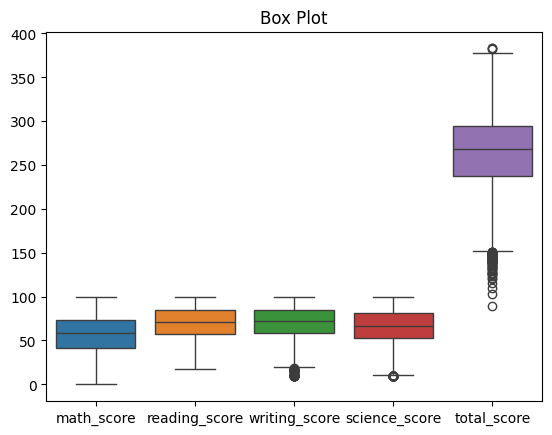

In [75]:
sns.boxplot(df)
plt.title("Box Plot")

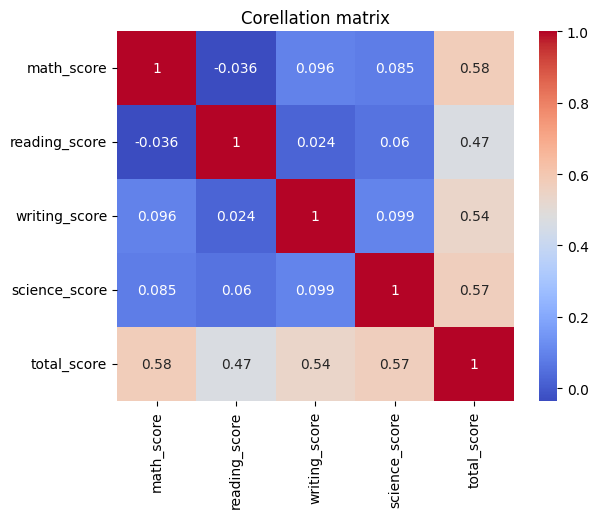

In [76]:
corr = df.corr()
plt.Figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corellation matrix")
plt.show()

 II. Find mean “total_score” for each groups “gender” and “race_ethnicity” and plot a bar graph.


In [77]:
df1 = pd.read_csv("../../assests/Student_performance_10k.csv")


C:\Users\isang\AppData\Local\Temp\ipykernel_17772\78006765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='mean_total_score', data = mean_scores, palette='Blues')


<Axes: xlabel='gender', ylabel='mean_total_score'>

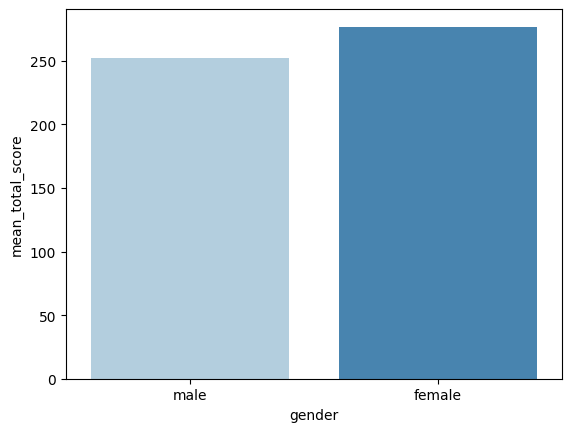

In [78]:
male_mean = df1[df1['gender']=='male']['total_score'].mean()
female_mean = df1[df1['gender']=='female']['total_score'].mean()
mean_scores = pd.DataFrame({
    'gender': ['male', 'female'],
    'mean_total_score': [male_mean, female_mean]
})
sns.barplot(x='gender', y='mean_total_score', data = mean_scores, palette='Blues')

  III. Plot a scatter-plot between “math_score” and “science_score” and comment on the relationship that you get.


<Axes: xlabel='math_score', ylabel='science_score'>

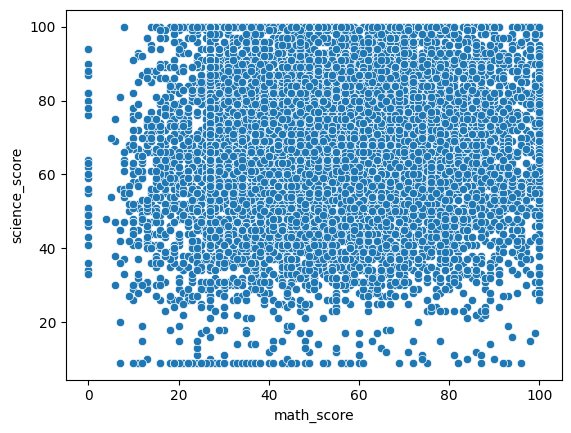

In [79]:
scatter_data = pd.DataFrame({
    'math_score' : df['math_score'],
    'science_score': df['science_score']
})
sns.scatterplot(scatter_data, x='math_score', y='science_score')

 IV. Show the distribution of “level_of_education”, “race_ethnicity” and “gender” in apie chart. 


([<matplotlib.patches.Wedge at 0x2946ea87750>,
 [Text(0.002769550336411407, 1.0999965134448992, ''),
  Text(-0.008654492014553037, -1.0999659539131064, ''),
  Text(1.0999686244711744, -0.008308139321918605, ''),
  Text(1.0999965141382035, -0.0027692749594786445, ''),
  Text(1.0999999455863272, -0.00034599144103441046, '')])

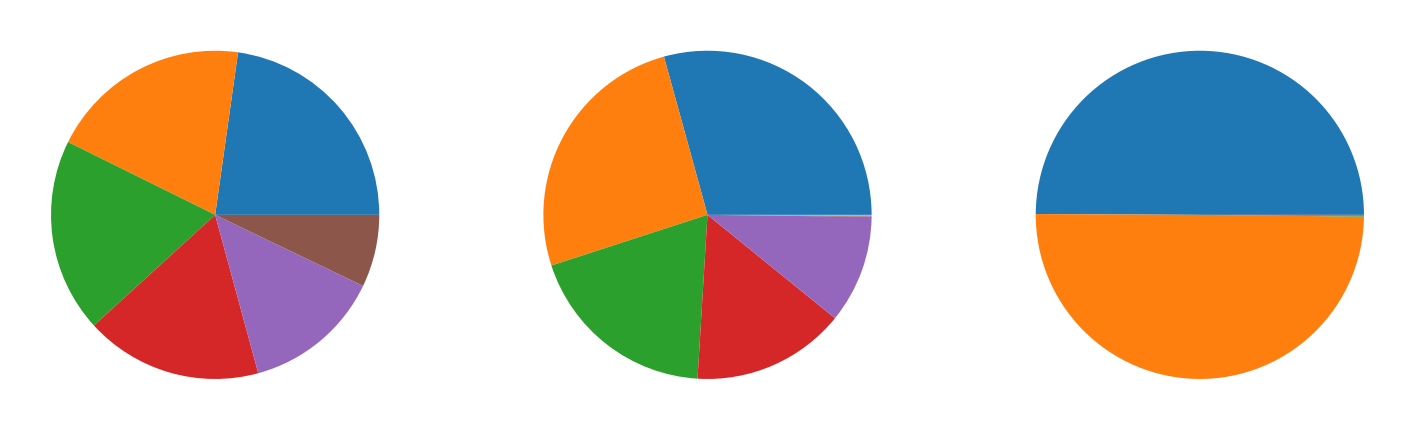

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

education_count = df1['parental_level_of_education'].value_counts()
axes[0].pie(education_count)
race_ethnicity = df1['race_ethnicity'].value_counts()
axes[1].pie(race_ethnicity)
gender = df1['gender'].value_counts()
axes[2].pie(gender)

V. Plot a heatmap to see missing values for some column of your choice

<Axes: >

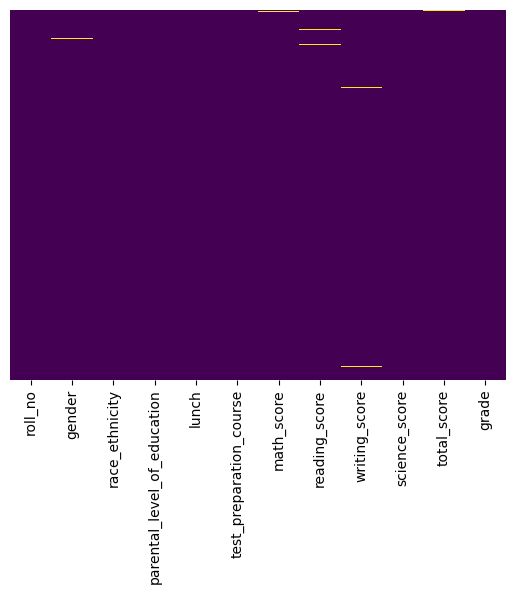

In [83]:
sns.heatmap(df1.isna(), cbar=False, cmap='viridis', xticklabels=df1.columns, yticklabels=False)